# 1.IMPORT LIBRARIES

In [8]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 2.LOAD DATASET

In [9]:
df=pd.read_csv("airline_passenger_satisfaction_model_build.csv")

In [10]:
df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,...,0,1,1,0,1,0,1,0,0,1
1,2,35,821,26,39.0,2,2,3,5,2,...,1,0,0,1,1,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,0,1,0,1,1,0,1,0,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,...,0,1,0,1,1,0,1,0,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,...,1,0,0,1,1,0,1,0,0,0


In [14]:
df.shape

(129487, 29)

In [11]:
X=df.drop(['ID','Satisfaction'],axis=1)  #Remove ID because we will not use the feature 
y=df['Satisfaction']

# 3.SPLITTING DATASET

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
print('Shape of training set ',X_train.shape)
print('Shape of test set ',X_test.shape)

Shape of training set  (103589, 27)
Shape of test set  (25898, 27)


# 4.MODEL AND EVALUATION

1.KNN

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

##print classification report
print(classification_report(y_test,y_pred,labels=[0,1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.73      0.68      0.70     11153
           1       0.77      0.81      0.79     14745

    accuracy                           0.75     25898
   macro avg       0.75      0.74      0.75     25898
weighted avg       0.75      0.75      0.75     25898



2.RANDOM FOREST CLASSIFIER


In [20]:
rf_model=RandomForestClassifier(n_estimators=100 ,random_state=42)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

##print classification report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11153
           1       0.96      0.98      0.97     14745

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



3.GRADIENT BOOSTING CLASSIFIER

In [21]:
gb_model=GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)

##print classification report
print(classification_report(y_test,y_pred,labels=[0,1]))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11153
           1       0.94      0.96      0.95     14745

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



# 5.LETS TRY TO IMPROVE PERFORMANCE OF KNNUSING STANDARD SCALER

In [22]:
#Scale the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
knn_scaled_model=KNeighborsClassifier(n_neighbors=5)
knn_scaled_model.fit(X_train_scaled,y_train)
y_pred=knn_scaled_model.predict(X_test_scaled)

##print classification report
print(classification_report(y_test,y_pred,labels=[0,1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11153
           1       0.91      0.96      0.94     14745

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898



OVERALL,RANDOM FOREST HAS THE BEST PERFORMANCE FOR BOTH CLASSES BASED ON THE WEIGHTED AVERAGE F-1 SCORE,WITH A VALUE OF 0.96

# 6.CHECK FEATURE IMPORTANCE

<AxesSubplot:xlabel='importance', ylabel='index'>

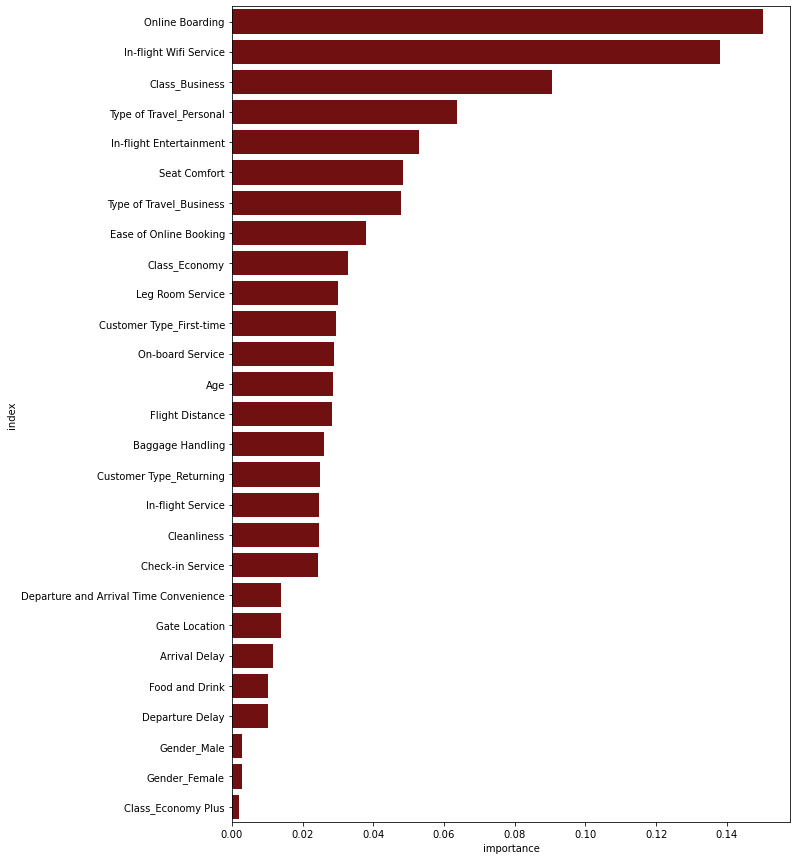

In [34]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
feature_importances=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance',ascending=False)

fig,ax=plt.subplots(1,1,figsize=(10,15))
sns.barplot(x='importance',y='index',color='#800000', data=feature_importances.reset_index())